# COMPARE HSP2 TO HSPF USING TEST10

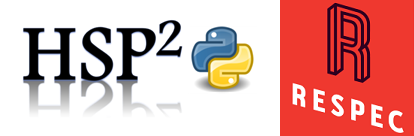

Copyright 2020 for this Jupyter Notebook and YouTube Video by RESPEC, INC.  All rights reserved.

$\textbf{HSP}^{\textbf{2}}\ \text{and}\ \textbf{HSP2}\ $ Copyright 2020 by RESPEC INC. and released under the *GNU AFFERO GENERAL PUBLIC LICENSE*

This Notebook will compare the results of running HSPF and HSP$^2$ for the basic hydrology (PWATER, IWATER, and HYDR) to confirm the proper calculations of HSP$^2$

Calleg is a real watershed and has
+ 27 IMPLND segments,
+ 129 PERLND segments,
+ 119 RCHRES segments,
+ 9 years of simulation time with hourly time steps (78,888 timesteps) from 1993-10-01 to 2002-10-01

This Notebook assumes HSPF has been run and the HBN data saved to an HDF5 file in the **HSPF RUN** directory.

## Required Python imports  and setup

In [1]:
import os

from matplotlib import pyplot as plt
from pandas import DataFrame, options, read_hdf

# Set display options for convenience, does't change the data
options.display.max_rows = 150
options.display.max_columns = 20
options.display.float_format = (
    "{:.4f}".format
)  # display 4 digits after the decimal point

%matplotlib inline

from HSP2 import main, versions
from HSP2tools import readUCI, readWDM

versions(["matplotlib", "tables", "h5py"])

,version
Python,"3.10.14 | packaged by conda-forge | (main, Mar..."
HSP2,0.11.0a1
numpy,1.26.4
numba,0.59.1
pandas,2.2.2
matplotlib,3.8.4
tables,3.9.2
h5py,3.11.0
os,Linux-5.15.0-91-generic-x86_64-with-glibc2.35
processor,x86_64


### If you get the HSP2 Not Found error:
```python
ModuleNotFoundError: No module named 'HSP2'
```
Then run the following terminal command with your local absolute path to this repo (enabled in this notebook with the `!` magic command), AND restart the kernel.
See https://github.com/LimnoTech/HSPsquared#4-add-your-hspsquared-path-to-anaconda-sites-packages

In [2]:
!conda-develop /Users/aaufdenkampe/Documents/Python/limno.HSPsquared/

/bin/bash: line 1: conda-develop: command not found


Convenient name strings to get to the data

In [3]:
# Confirm your active conda environment for this notebook.
os.environ["CONDA_DEFAULT_ENV"]

'hsp2_310'

In [4]:
from pathlib import Path

# get current working directory
Path.cwd()

PosixPath('/home/tim/programming/HSPsquared/tests/test10/HSP2results')

In [5]:
wdmname = "test10.wdm"
uciname = "test10.uci"
HBN = "test10_hspf.h5"
hdfname = "test10_hsp2_dev2WDM_6.h5"

## Run HSP2 on the calleg

In [6]:
# Optional setting to testing Numba
os.environ["NUMBA_DISABLE_JIT"] = "0"  # '1' turns off Numba for this session only

### Create HDF5 file

In [7]:
%time
readUCI(uciname, hdfname)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.38 µs
ACTIVITY
PRINT-INFO
GEN-INFO
ICE-FLAG
SNOW-PARM1
SNOW-PARM2
SNOW-INIT1
SNOW-INIT2
PWAT-PARM1
PWAT-PARM2
PWAT-PARM3
PWAT-PARM4
MON-INTERCEP
MON-UZSN
MON-MANNING
MON-LZETPARM
PWAT-STATE1
PSTEMP-PARM2
PWT-PARM2


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:395: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  + pd.Timedelta(int(d['SHR']), 'h') + pd.Timedelta(int(d['SMI']), 'T'))[0:16]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:397: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  + pd.Timedelta(int(d['EHR']), 'h') + pd.Timedelta(int(d['EMI']), 'T'))[0:16]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors='ignore' is deprecated and will raise in a 

ACTIVITY
PRINT-INFO
GEN-INFO
ICE-FLAG
SNOW-PARM1
SNOW-PARM2
SNOW-INIT1
SNOW-INIT2
IWAT-PARM1
IWAT-PARM2
IWAT-PARM3
IWAT-STATE1
SLD-PARM2
SLD-STOR
IWT-PARM2
NQUALS
QUAL-PROPS
QUAL-INPUT


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors

ACTIVITY
PRINT-INFO
GEN-INFO
HYDR-PARM1
HYDR-PARM2
HYDR-INIT
NCONS
CONS-DATA
HEAT-PARM
HEAT-INIT
SANDFG
SED-GENPARM
SAND-PM
SILT-CLAY-PM
SILT-CLAY-PM
SSED-INIT
BED-INIT
GQ-GENDATA
GQ-QALDATA
GQ-QALFG
GQ-HYDPM
GQ-ROXPM
GQ-PHOTPM
GQ-CFGAS
GQ-BIOPM
GQ-GENDECAY
GQ-SEDDECAY
GQ-KD
GQ-ADRATE
GQ-SEDCONC
GQ-VALUES
GQ-ALPHA
GQ-GAMMA
GQ-DELTA
GQ-CLDFACT
BENTH-FLAG
SCOUR-PARMS
OX-FLAGS
OX-GENPARM
OX-BENPARM
OX-CFOREA
OX-REAPARM
OX-INIT
NUT-FLAGS
NUT-BENPARM
NUT-NITDENIT
NUT-NH3VOLAT
NUT-BEDCONC
NUT-ADSPARM
NUT-DINIT
NUT-ADSINIT
PLNK-FLAGS
PLNK-PARM1
PHYTO-PARM
ZOO-PARM1
PLNK-INIT
PH-PARM1
PH-INIT


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:98: FutureWarning: errors

In [8]:
%time
readWDM(wdmname, hdfname)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.34 µs
39 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

41 reading from wdm
42 reading from wdm
46 reading from wdm
113 reading from wdm
119 reading from wdm
121 reading from wdm
122 reading from wdm
123 reading from wdm
124 reading from wdm
125 reading from wdm
126 reading from wdm
127 reading from wdm
131 reading from wdm
132 reading from wdm
134 reading from wdm
135 reading from wdm
136 reading from wdm
140 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

,Start,Stop,Freq,Length,TSTYPE,TFILL,STAID,STNAM
TS039,1976-01-01 00:00:00,1977-01-01 00:00:00,1H,8784,PREC,-999.0000,HOURLY PREC,PRECIP TRAER IOWA
TS041,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,EVAP,-999.0000,DAILY EVAP,FARMERS COOP WEATHER STN
TS042,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,WIND,-999.0000,DAILY WIND,FARMERS COOP WEATHER STN
TS046,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,SOLR,-999.0000,2 HOUR RAD,FARMERS WEATHER STN
TS113,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.0000,DAILY FLOW,IOWA RIVER MARSHALLTOWN
TS119,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.0000,DAILY FLOW,IOWA RIVER MARENGO
TS121,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.0000,2 HOUR AIR TEMP,CEDAR RAPIDS IOWA
TS122,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.0000,2 HOUR AIR TEMP,IOWA FALLS IOWA
TS123,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.0000,2 HOUR AIR TEMP,MARSHALLTOWN IOWA
TS124,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,DEWP,-999.0000,DAILY DEW PT,CEDAR RAPIDS IOWA


### Run

Using profiler

In [9]:
%%prun  -l 60 -T NumbaProfile.txt -q
main(hdfname, saveall=True)

2024-04-28 12:45:47.57   Processing started for file test10_hsp2_dev2WDM_6.h5; saveall=True
2024-04-28 12:45:53.19   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2024-04-28 12:45:53.19      PERLND P001 DELT(minutes): 60


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2/utilities.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[stop] = ts[-1]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2/utilities.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[stop] = ts[-1]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2/utilities.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[stop

2024-04-28 12:45:55.58         SNOW
2024-04-28 12:45:56.63         PWATER
2024-04-28 12:45:57.15         PSTEMP
2024-04-28 12:45:58.40         PWTGAS
2024-04-28 12:46:01.06      RCHRES R001 DELT(minutes): 60
2024-04-28 12:46:01.09         HYDR


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2/utilities.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[stop] = ts[-1]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2/utilities.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[stop] = ts[-1]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2/utilities.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[stop

2024-04-28 12:46:12.15         ADCALC
2024-04-28 12:46:13.34         CONS
2024-04-28 12:46:15.37         HTRCH
2024-04-28 12:46:18.95         SEDTRN
2024-04-28 12:46:35.24         RQUAL


SystemError: CPUDispatcher(<function _rqual_run at 0x7f45c30f4ee0>) returned NULL without setting an exception

In [ ]:
with open("NumbaProfile.txt", "r") as f:
    for line in f:
        total = float(line.split()[7])
        print(line)
        f.readline()
        f.readline()
        f.readline()
        f.readline()
        print(f.readline().rstrip())
        break
    sum = 0.0
    for line in f:
        sum += float(line.split()[1])
        print(line.rstrip())

        # Pareto rule, look for calls cumsum to 80% time, ignore the rest
        if sum >= 0.8 * total:
            break
print(f"Cum Sum {100.0 * sum/total:.2f}%")

## BELOW HERE: Output from Steve's testing

Normal run

In [ ]:
main(hdfname, saveall=True)

## Read Summary from HBN file

Find the higest frequency data available.

In [ ]:
summary = read_hdf(HBN, "SUMMARY")
summary.Frequency.unique()

So the best available is monthly data.

## Automate checking by output flow

In [ ]:
def hsp2key(hspfkey):
    op, activity, segment, _ = hspfkey.split("_")
    return f"RESULTS/{op}_{op[0]}{segment:0>3s}/{activity}"

In [ ]:
def monthlyoutflow(keys, flowname):
    data = DataFrame()
    for key in keys.index:
        hsp2 = read_hdf(hdfname, hsp2key(key))[flowname].resample("M").sum().to_numpy()
        hspf = read_hdf(HBN, key)[flowname].to_numpy()

        hsp2sum = hsp2.sum()
        hspfsum = hspf.sum()

        segment = key.split("_")[2]

        data.loc[segment, "HSP2 SUM"] = hsp2.sum()
        data.loc[segment, "HSPF SUM"] = hspf.sum()
        data.loc[segment, "Percent diff"] = 100.0 * (hspfsum - hsp2sum) / hspfsum
        data.loc[segment, "abs(Percent diff)"] = (
            100.0 * abs(hspfsum - hsp2sum) / hspfsum
        )

    return data.sort_values(by=["abs(Percent diff)"])

### Define a function to plot HSPF and HSP2 data

In [ ]:
def plot(operation, ils, activity, name, how="sum"):
    hspf = f"{operation}_{activity}_{ils:0>3s}_4"
    tshspf = read_hdf(HBN, hspf)[name]

    hsp2 = f"RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}"
    if how == "sum":
        tshsp2 = (
            read_hdf(hdfname, hsp2)[f"{name}_{how}"].resample("M").sum().shift(1, "D")
        )
    elif how == "last":
        tshsp2 = (
            read_hdf(hdfname, hsp2)[f"{name}_{how}"].resample("M").last().shift(1, "D")
        )

    plt.figure(figsize=(10, 8))
    plt.plot(tshspf.index, tshspf, label="HSPF", color="r")
    plt.plot(tshsp2.index, tshsp2, label="HSP2", color="b")
    plt.legend()
    plt.title(f"{operation} {operation[0]}{ils:0>3s}, {activity} {name}")

In [ ]:
def scatter(operation, ils, activity, name, how="sum"):
    hspf = f"{operation}_{activity}_{ils:0>3s}_4"
    tshspf = read_hdf(HBN, hspf)[name]

    hsp2 = f"RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}"
    if how == "sum":
        tshsp2 = (
            read_hdf(hdfname, hsp2)[f"{name}_{how}"].resample("M").sum().shift(1, "D")
        )
    elif how == "last":
        tshsp2 = (
            read_hdf(hdfname, hsp2)[f"{name}_{how}"].resample("M").last().shift(1, "D")
        )

    plt.scatter(tshspf, tshsp2)

### IMPLND

In [ ]:
implndkeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "IMPLND")]
implndkeys[0:10]

In [ ]:
delta = monthlyoutflow(implndkeys, "SURO")
delta

Look at the statistics for the percent difference column

In [ ]:
delta.describe()

In [ ]:
delta["Percent diff"].hist()

In [ ]:
ils = delta.index[-1]
print("WORST IMPLND SEGMENT IS", ils)

#### IMPLND IWATER SURO, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "SURO", "sum")

In [ ]:
scatter("IMPLND", ils, "IWATER", "SURO", "sum")

#### IMPLND IWATER IMPEV, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "IMPEV", "sum")

In [ ]:
scatter("IMPLND", ils, "IWATER", "IMPEV", "sum")

#### IMPLND IWATER PET, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "PET", "sum")

In [ ]:
scatter("IMPLND", ils, "IWATER", "PET", "sum")

#### IMPLND IWATER RETS, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "RETS", "last")

In [ ]:
scatter("IMPLND", ils, "IWATER", "RETS", "last")

#### IMPLND IWATER SUPY, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "SUPY", "sum")

In [ ]:
scatter("IMPLND", ils, "IWATER", "SUPY", "sum")

#### IMPLND IWATER SURS, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "SURS", "last")

In [ ]:
scatter("IMPLND", ils, "IWATER", "SURS", "last")

## Automate checking PERLNDs for PERO

In [ ]:
perlndkeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "PERLND")]
perlndkeys[0:10]

In [ ]:
delta = monthlyoutflow(perlndkeys, "PERO")
delta

Look at the statistics for the percent difference column

In [ ]:
delta.describe()

In [ ]:
delta["Percent diff"].hist()

In [ ]:
pls = delta.index[-1]
print("WORST PERLND SEGMENT IS", pls)

#### PERLND PWATER AGWLI

In [ ]:
plot("PERLND", pls, "PWATER", "AGWLI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "AGWLI", "sum")

#### PERLND PWATER SURLI

In [ ]:
plot("PERLND", pls, "PWATER", "SURLI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "SURLI", "sum")

#### PERLND PWATER AGWO

In [ ]:
plot("PERLND", pls, "PWATER", "AGWO", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "AGWO", "sum")

#### PERLND PWATER BASET

In [ ]:
plot("PERLND", pls, "PWATER", "BASET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "BASET", "sum")

##### PERLND PWATER CEPE

In [ ]:
plot("PERLND", pls, "PWATER", "CEPE", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "CEPE", "sum")

#### PERLND PWATER IFWI

In [ ]:
plot("PERLND", pls, "PWATER", "IFWI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "IFWI", "sum")

#### PERLND PWATER IFWO

In [ ]:
plot("PERLND", pls, "PWATER", "IFWO", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "IFWO", "sum")

#### PERLND PWATER IGWI

In [ ]:
plot("PERLND", pls, "PWATER", "IGWI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "IGWI", "sum")

#### PERLND PWATER INFIL

In [ ]:
plot("PERLND", pls, "PWATER", "INFIL", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "INFIL", "sum")

#### PERLND PWATER LZET

In [ ]:
plot("PERLND", pls, "PWATER", "LZET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "LZET", "sum")

#### PERLND PWATER PERC

In [ ]:
plot("PERLND", pls, "PWATER", "PERC", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "PERC", "sum")

#### PERLND PWATER PERO

In [ ]:
plot("PERLND", pls, "PWATER", "PERO", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "PERO", "sum")

#### PERLND PWATER PERS

In [ ]:
plot("PERLND", pls, "PWATER", "PERS", "last")

In [ ]:
scatter("PERLND", pls, "PWATER", "PERS", "last")

#### PERLND PWATER PET, Monthly

In [ ]:
plot("PERLND", pls, "PWATER", "PET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "PET", "sum")

#### PERLND PWATER SUPY

In [ ]:
plot("PERLND", pls, "PWATER", "SUPY", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "SUPY", "sum")

#### PERLND PWATER SURO

In [ ]:
plot("PERLND", pls, "PWATER", "SURO", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "SURO", "sum")

#### PERLND PWATER TAET

In [ ]:
plot("PERLND", pls, "PWATER", "TAET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "TAET", "sum")

#### PERLND PWATER UZET

In [ ]:
plot("PERLND", pls, "PWATER", "UZET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "UZET", "sum")

#### PERLND PWATER UZI

In [ ]:
plot("PERLND", pls, "PWATER", "UZI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "UZI", "sum")

## RCHRES

In [ ]:
rchreskeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "RCHRES")]
rchreskeys[0:10]

In [ ]:
delta = monthlyoutflow(rchreskeys, "ROVOL")
delta

Look at the statistics for the percent difference column

In [ ]:
delta.describe()

In [ ]:
delta["Percent diff"].hist()

In [ ]:
rid = delta.index[-1]
print("WORST RCHRES SEGMENT IS", rid)

#### RCHRES HYDR IVOL

In [ ]:
plot("RCHRES", rid, "HYDR", "IVOL", "sum")

In [ ]:
scatter("RCHRES", rid, "HYDR", "IVOL", "sum")

#### RCHRES HYDR PRSUPY

In [ ]:
plot("RCHRES", rid, "HYDR", "PRSUPY", "sum")

In [ ]:
scatter("RCHRES", rid, "HYDR", "PRSUPY", "sum")

#### RCHRES HYDR ROVOL

In [ ]:
plot("RCHRES", rid, "HYDR", "ROVOL", "sum")

In [ ]:
scatter("RCHRES", rid, "HYDR", "ROVOL", "sum")

#### RCHRES HYDR VOL

In [ ]:
plot("RCHRES", rid, "HYDR", "VOL", "last")

In [ ]:
scatter("RCHRES", rid, "HYDR", "VOL", "last")

#### RCHRES HYDR VOLEV

In [ ]:
plot("RCHRES", rid, "HYDR", "VOLEV", "sum")

In [ ]:
scatter("RCHRES", rid, "HYDR", "VOLEV", "sum")